In [9]:
#Problem Statement: Implementing Feedforward neural networks with Keras and TensorFlow. 
#a. Import the necessary packages. 
#b. Load the training and testing data (MNIST/CIFAR10). 
#c. Define the network architecture using Keras.
# d. Train the model using SGD.
#e. Evaluate the network.
# f. Plot the training loss and accuracy



import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import idx2numpy

In [8]:
!pip install idx2numpy


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7926 sha256=a842ab7854e59f048fe6bf145a0a209e7d8851cdad60f545352f93962a4d3395
  Stored in directory: c:\users\sahus\appdata\local\pip\cache\wheels\87\e5\e7\70fc742b3645ddf9d392f766feccbcc95cb3a3c806f8588af0
Successfully built idx2numpy


In [10]:
def load_data():
    # Paths to the .idx files
    train_images_path = 'train-images.idx3-ubyte'
    train_labels_path = 'train-labels.idx1-ubyte'
    test_images_path = 't10k-images.idx3-ubyte'
    test_labels_path = 't10k-labels.idx1-ubyte'

    # Convert .idx files to numpy arrays
    x_train = idx2numpy.convert_from_file(train_images_path)
    y_train = idx2numpy.convert_from_file(train_labels_path)
    x_test = idx2numpy.convert_from_file(test_images_path)
    y_test = idx2numpy.convert_from_file(test_labels_path)
(x_train ,y_train) ,(x_test , y_test) = mnist.load_data() #spiltting the data into training and testing datAuploaded by the minst dataset

x_train = x_train / 255
x_test = x_test /255

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
]) 

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=['accuracy'])

In [14]:
history=model.fit(x_train,
y_train,validation_data=(x_test,y_test),epochs=50)     

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6371 - accuracy: 0.8393 - val_loss: 0.3541 - val_accuracy: 0.9048
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3341 - accuracy: 0.9078 - val_loss: 0.2930 - val_accuracy: 0.9197
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2850 - accuracy: 0.9206 - val_loss: 0.2591 - val_accuracy: 0.9284
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2551 - accuracy: 0.9289 - val_loss: 0.2374 - val_accuracy: 0.9361
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2331 - accuracy: 0.9347 - val_loss: 0.2172 - val_accuracy: 0.9395
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2155 - accuracy: 0.9407 - val_loss: 0.2060 - val_accuracy: 0.9441
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2009 - accuracy: 0.9436 - val_loss: 0.1932 - val_accuracy:

In [58]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Loss=%0.3f'%test_loss)
print('Accuracy=%0.3f'%test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9757 - loss: 0.0804
Loss=0.067
Accuracy=0.979


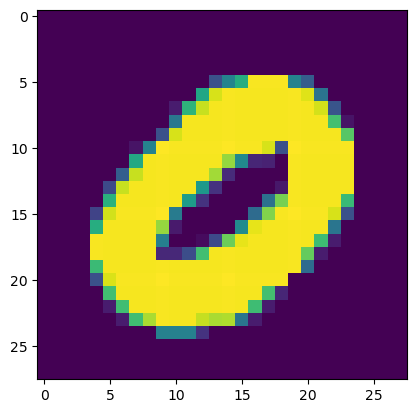

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


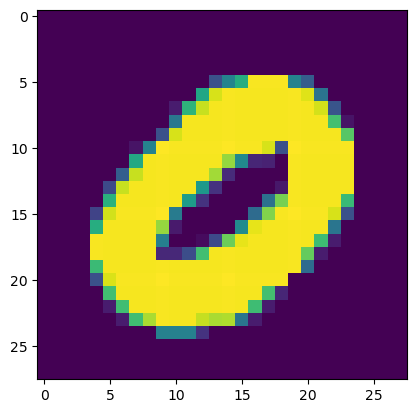

In [46]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [49]:
print('Predicted Value: ', predicted_value[n])

Predicted Value:  [9.9999976e-01 9.5416282e-16 2.3926904e-07 8.8703340e-15 1.2585188e-13
 2.0540346e-16 4.9131112e-11 7.5971250e-13 2.1483416e-11 2.0141267e-11]


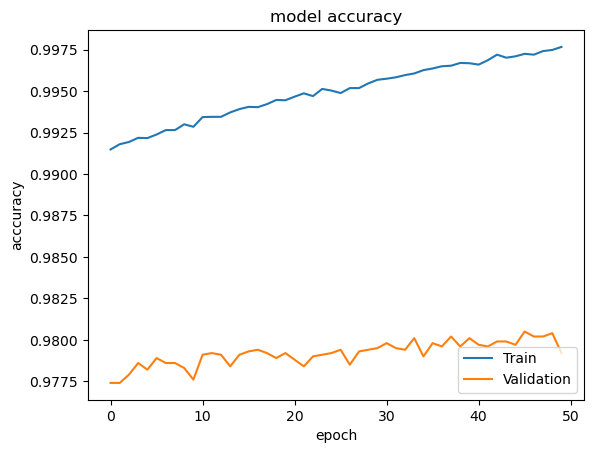

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acccuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='lower right')
plt.show()

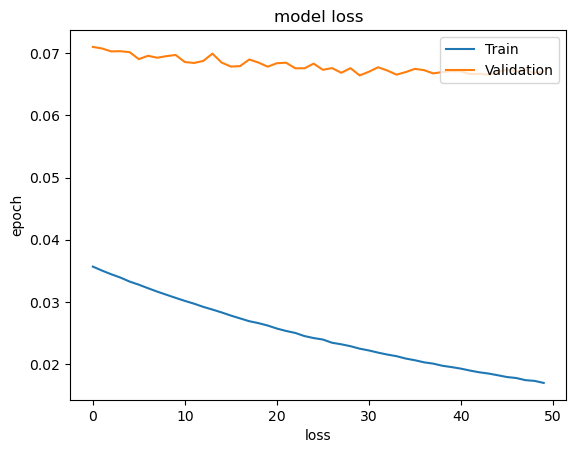

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('epoch')
plt.xlabel('loss')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()
